## Modelos de clasificación

En este notebook vamos a entrenar cinco modelos diferentes de clasificación con el objetivo de predecir, en un periodo a 10 años, si un municipio será un área poblada o despoblada.  
Además, calcularemos las variables más significativas del modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = None
pd.options.display.max_rows = None

Carga de los datos:

In [2]:
Despoblacion = pd.read_csv('/home/dsc/Python/Despoblacion/5.Analisis_Preliminar_Variables/Despoblacion.csv', 
                           dtype = {'Codigo CCAA' : str, 'Codigo Provincia' : str, 'Codigo Municipio' : str})

Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
0,Pais Vasco,16,Araba/Álava,01,Alegría-Dulantzi,01001,2803.0,1466.0,1337.0,19.95,140.50,568.0,37.0,18.0,14.0,784.0,617.0,453.0,164.0,175.0,86.0,89.0,0.0,0.0,0.0,0.0,1.0,4.0,25.0,1.0,1.0,150.0,127.0,277.0,279.0,268.0,547.0,667.0,1346.0,1249.0,645.0,1965.0,240.0,1250.0,1410.0,30.0,90.0,75.0,325.0,1835.0,255.0,120.0,120.0,230.0,390.0,60.0,60.0,335.0,195.0,2635.0,195.0,685.0,705.0,1125.0,105.0,40.0,655.0,425.0,1947.0,1664.0,1843.0,828.73,1124.34,35.0,6.0,0.0
1,Pais Vasco,16,Araba/Álava,01,Amurrio,01002,10014.0,5030.0,4984.0,96.30,103.99,219.0,104.0,37.0,88.0,4397.0,5861.0,4843.0,1018.0,720.0,330.0,390.0,0.0,0.0,0.0,0.0,2.0,9.0,185.0,3.0,0.0,409.0,334.0,742.0,869.0,918.0,1787.0,1316.0,5154.0,4435.0,1285.0,6935.0,1795.0,3975.0,5120.0,120.0,130.0,675.0,1750.0,6975.0,1955.0,245.0,320.0,745.0,1285.0,500.0,330.0,955.0,730.0,9265.0,730.0,2545.0,2945.0,2745.0,690.0,360.0,2360.0,1505.0,6906.0,6196.0,2166.0,3579.80,5568.50,381.0,367.0,0.0
2,Pais Vasco,16,Araba/Álava,01,Añana,01049,168.0,86.0,82.0,21.92,7.66,574.0,1.0,0.0,7.0,30.0,20.0,14.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,5.0,11.0,12.0,10.0,22.0,181.0,214.0,209.0,15.0,105.0,40.0,65.0,75.0,2.0,2.0,15.0,35.0,102.0,50.0,5.0,10.0,10.0,20.0,10.0,15.0,5.0,30.0,105.0,30.0,45.0,25.0,60.0,5.0,2.0,15.0,60.0,130.0,65.0,229.0,90.70,1212.00,20.0,9.0,1.0
3,Pais Vasco,16,Araba/Álava,01,Aramaio,01003,1496.0,784.0,712.0,73.02,20.49,333.0,13.0,3.0,10.0,224.0,141.0,88.0,53.0,23.0,12.0,11.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,0.0,0.0,23.0,34.0,57.0,42.0,38.0,80.0,423.0,706.0,681.0,265.0,955.0,290.0,725.0,680.0,2.0,2.0,95.0,250.0,980.0,325.0,25.0,70.0,45.0,205.0,45.0,70.0,60.0,125.0,1385.0,125.0,380.0,270.0,545.0,120.0,65.0,315.0,260.0,1236.0,1014.0,431.0,616.46,2055.80,191.0,215.0,0.0
4,Pais Vasco,16,Araba/Álava,01,Armiñón,01006,229.0,112.0,117.0,12.97,17.66,467.0,2.0,0.0,3.0,137.0,125.0,90.0,35.0,10.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,4.0,4.0,8.0,24.0,38.0,62.0,141.0,153.0,153.0,40.0,150.0,35.0,100.0,110.0,2.0,2.0,10.0,30.0,160.0,35.0,10.0,15.0,30.0,20.0,5.0,10.0,2.0,20.0,200.0,20.0,45.0,95.0,60.0,5.0,2.0,65.0,30.0,205.0,145.0,0.0,0.00,859.32,19.0,2.0,0.0


Escalamos los datos numéricos con MinMaxScaler:

In [3]:
Columnas = Despoblacion.columns[6 : -2]
scaler = MinMaxScaler()
Despoblacion[Columnas] = scaler.fit_transform(Despoblacion[Columnas])

Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
0,Pais Vasco,16,Araba/Álava,01,Alegría-Dulantzi,01001,0.000857,0.000956,0.000769,0.011382,0.006520,0.334711,0.001123,0.001391,0.000527,0.000450,0.000559,0.000812,0.000301,0.000788,0.000769,0.000808,0.0,0.0,0.0,0.0,0.005348,0.002345,0.001224,0.004505,0.009804,0.000515,0.000375,0.000440,0.000725,0.000523,0.000610,0.005018,0.000829,0.000811,0.001407,0.000929,0.000387,0.000841,0.001071,0.000555,0.000766,0.000341,0.000621,0.000829,0.000400,0.001645,0.001136,0.000972,0.001021,0.000371,0.000577,0.000504,0.000508,0.000938,0.000508,0.000836,0.000936,0.001415,0.000363,0.000268,0.000785,0.000866,0.000988,0.001017,0.000290,0.000440,0.008575,0.005687,6.0,0.0
1,Pais Vasco,16,Araba/Álava,01,Amurrio,01002,0.003066,0.003286,0.002871,0.055005,0.004822,0.128689,0.003157,0.002859,0.003315,0.002531,0.005312,0.008682,0.001867,0.003242,0.002949,0.003539,0.0,0.0,0.0,0.0,0.010695,0.005275,0.009058,0.013514,0.000000,0.001404,0.000986,0.001177,0.002258,0.001793,0.001993,0.009945,0.003187,0.002892,0.002803,0.003281,0.002915,0.002674,0.003892,0.002340,0.001114,0.003073,0.003361,0.003157,0.003065,0.003358,0.003030,0.003169,0.003364,0.003181,0.003172,0.001436,0.001917,0.003300,0.001917,0.003104,0.003909,0.003453,0.002384,0.002411,0.002834,0.003078,0.003504,0.003788,0.000341,0.001900,0.042471,0.061911,367.0,0.0
2,Pais Vasco,16,Araba/Álava,01,Añana,01049,0.000050,0.000054,0.000046,0.012507,0.000343,0.338253,0.000030,0.000000,0.000264,0.000016,0.000018,0.000025,0.000011,0.000018,0.000027,0.000009,0.0,0.0,0.0,0.0,0.005348,0.000000,0.000000,0.000000,0.009804,0.000021,0.000015,0.000017,0.000031,0.000020,0.000025,0.001329,0.000129,0.000132,0.000033,0.000049,0.000062,0.000044,0.000056,0.000000,0.000000,0.000068,0.000063,0.000044,0.000078,0.000069,0.000095,0.000034,0.000052,0.000051,0.000144,0.000008,0.000074,0.000037,0.000074,0.000055,0.000033,0.000075,0.000017,0.000013,0.000016,0.000119,0.000066,0.000040,0.000036,0.000048,0.009244,0.003250,9.0,1.0
3,Pais Vasco,16,Araba/Álava,01,Aramaio,01003,0.000457,0.000511,0.000409,0.041704,0.000939,0.195986,0.000395,0.000232,0.000377,0.000128,0.000128,0.000158,0.000097,0.000104,0.000107,0.000100,0.0,0.0,0.0,0.0,0.005348,0.001172,0.000392,0.000000,0.000000,0.000079,0.000100,0.000090,0.000109,0.000074,0.000089,0.003166,0.000433,0.000440,0.000578,0.000451,0.000468,0.000488,0.000516,0.000000,0.000000,0.000432,0.000477,0.000442,0.000510,0.000343,0.000663,0.000183,0.000537,0.000275,0.000673,0.000090,0.000324,0.000493,0.000324,0.000464,0.000358,0.000686,0.000415,0.000435,0.000376,0.000528,0.000627,0.000620,0.000068,0.000327,0.015680,0.031037,215.0,0.0
4,Pais Vasco,16,Araba/Álava,01,Armiñón

Dividimos los datos en conjunto de entrenamiento y test:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
                                        Despoblacion.drop(['Nombre CCAA', 'Codigo CCAA', 'Nombre Provincia', 'Codigo Provincia', 
                                                        'Nombre Municipio', 'Codigo Municipio', 'Superficie Km2',
                                                        'Densidad Poblacion', 'Umbral'], axis = 1),
                                        Despoblacion['Umbral'],
                                        train_size   = 0.8,
                                        random_state = 42, 
                                        stratify = Despoblacion['Umbral']
                                    )

In [5]:
print('Tamaño de X_train:', X_train.shape)
print('Tamaño de X_test:', X_test.shape)
print('Tamaño de y_train:', y_train.shape)
print('Tamaño de y_test:', y_test.shape)

Tamaño de X_train: (6460, 67)
Tamaño de X_test: (1616, 67)
Tamaño de y_train: (6460,)
Tamaño de y_test: (1616,)


Definimos una función de ayuda para evaluar cada uno de los 5 modelos que vamos a entrenar:

In [6]:
def modelo_evaluacion(modelo, x_test, y_test):

    y_pred = modelo.predict(x_test)

    # Calculamos accuracy, precision, recall y f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Cálculo del area bajo la curva (AUC)
    y_pred_proba = modelo.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display matriz de confusión
    cm = metrics.confusion_matrix(y_test, y_pred)
    Opciones = ['True Neg','False Pos','False Neg','True Pos']
    Datos = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    Etiquetas = [f'{v1}\n{v2}' for v1, v2 in
          zip(Opciones, Datos)]
    Etiquetas = np.asarray(Etiquetas).reshape(2,2)
    sns.heatmap(cm, annot = Etiquetas, fmt = '', cmap = 'BuGn')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc}

Entrenamos un modelo de referencia para cada algoritmo utilizando los parámetros predeterminados establecidos por Sklearn.

1. Regresión logística

Accuracy: 0.7964108910891089
Precision: 0.7710557532621589
Recall: 0.8269720101781171
F1 Score: 0.7980356046654389
AUC: 0.8689950642263712
Matriz de confusión:


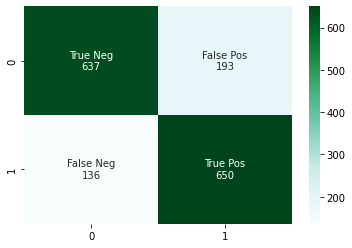

In [7]:
rl = LogisticRegression(random_state = 0, max_iter = 150) #STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
rl.fit(X_train, y_train)

rl_eval = modelo_evaluacion(rl, X_test, y_test)

print('Accuracy:', rl_eval['acc'])
print('Precision:', rl_eval['prec'])
print('Recall:', rl_eval['rec'])
print('F1 Score:', rl_eval['f1'])
print('AUC:', rl_eval['auc'])
print('Matriz de confusión:')

2. Support Vector Machines (SVM)

Accuracy: 0.5804455445544554
Precision: 0.5473684210526316
Recall: 0.7938931297709924
F1 Score: 0.64797507788162
AUC: 0.627414237101076
Matriz de confusión:


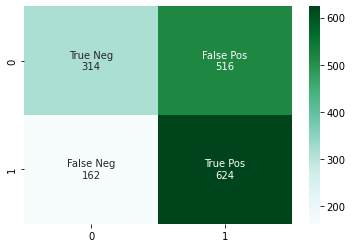

In [8]:
svc = SVC(random_state = 0, probability = True) #predict_proba is not available when probability=False
svc.fit(X_train, y_train)

svc_eval = modelo_evaluacion(svc, X_test, y_test)

print('Accuracy:', svc_eval['acc'])
print('Precision:', svc_eval['prec'])
print('Recall:', svc_eval['rec'])
print('F1 Score:', svc_eval['f1'])
print('AUC:', svc_eval['auc'])
print('Matriz de confusión:')

3. Random Forest

Accuracy: 0.9251237623762376
Precision: 0.9301423027166882
Recall: 0.9147582697201018
F1 Score: 0.922386144964721
AUC: 0.981209571108863
Matriz de confusión:


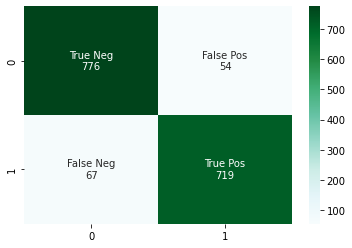

In [9]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

rf_eval = modelo_evaluacion(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('AUC:', rf_eval['auc'])
print('Matriz de confusión:')

4. Naive Bayes

Accuracy: 0.5346534653465347
Precision: 0.5110677083333334
Recall: 0.9987277353689568
F1 Score: 0.6761412575366064
AUC: 0.5656151322848647
Matriz de confusión:


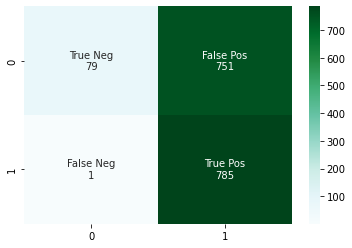

In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_eval = modelo_evaluacion(nb, X_test, y_test)

print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('AUC:', nb_eval['auc'])
print('Matriz de confusión:')

5. K-vecinos más cercanos (KNN)

Accuracy: 0.7481435643564357
Precision: 0.7264038231780168
Recall: 0.7735368956743003
F1 Score: 0.7492298213185459
AUC: 0.812076550476716
Matriz de confusión:


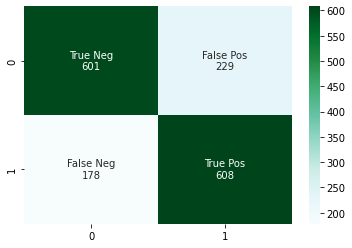

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_eval = modelo_evaluacion(knn, X_test, y_test)

print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('AUC:', knn_eval['auc'])
print('Matriz de confusión:')

Comparamos que tan bien funciona cada modelo.  

Representamos dos gráficos:  
- Gráfico de barras agrupadas para mostrar el valor de accuracy, precisión, recall y F1 de todos nuestros modelos  
- Gráfico de líneas para mostrar el AUC de todos nuestros modelos  

A mayores creamos un DataFrame con las métricas de todos los modelos

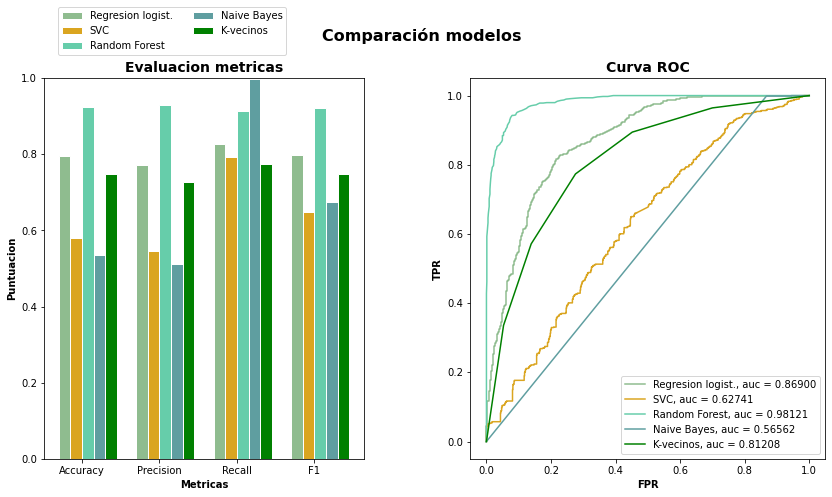

,Accuracy,Precision,Recall,F1
rl,0.796411,0.771056,0.826972,0.798036
svc,0.580446,0.547368,0.793893,0.647975
rf,0.925124,0.930142,0.914758,0.922386
nb,0.534653,0.511068,0.998728,0.676141
knn,0.748144,0.726404,0.773537,0.749230


In [12]:
# Inicializamos los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparación modelos', fontsize = 16, fontweight = 'bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Valores del primer gráfico
rl_score = [rl_eval['acc'], rl_eval['prec'], rl_eval['rec'], rl_eval['f1']]
svc_score = [svc_eval['acc'], svc_eval['prec'], svc_eval['rec'], svc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

# Posición de las barras en el eje X
barWidth = 0.15
r1 = np.arange(len(rl_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


# Primer gráfico
ax1.bar(r1, rl_score, width = barWidth, edgecolor='white', label = 'Regresion logist.', color = 'darkseagreen')
ax1.bar(r2, svc_score, width = barWidth, edgecolor='white', label = 'SVC', color = 'goldenrod')
ax1.bar(r3, rf_score, width = barWidth, edgecolor='white', label = 'Random Forest', color = 'mediumaquamarine')
ax1.bar(r4, nb_score, width = barWidth, edgecolor='white', label = 'Naive Bayes', color = 'cadetblue')
ax1.bar(r5, knn_score, width = barWidth, edgecolor='white', label = 'K-vecinos', color = 'green')

# Ejes x e y
ax1.set_xlabel('Metricas', fontweight = 'bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(rl_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Puntuacion', fontweight = 'bold')
ax1.set_ylim(0, 1)

# Leyenda y título
ax1.set_title('Evaluacion metricas', fontsize = 14, fontweight = 'bold')
pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax1.legend(loc = 9, bbox_to_anchor = (0.4, 1.2), ncol = 2)

# Segundo gráfico con las curvas AUC
ax2.plot(rl_eval['fpr'], rl_eval['tpr'], label = 'Regresion logist., auc = {:0.5f}'.format(rl_eval['auc']), color = 'darkseagreen')
ax2.plot(svc_eval['fpr'], svc_eval['tpr'], label = 'SVC, auc = {:0.5f}'.format(svc_eval['auc']), color = 'goldenrod')
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label = 'Random Forest, auc = {:0.5f}'.format(rf_eval['auc']), color = 'mediumaquamarine')
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label = 'Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']), color = 'cadetblue')
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label = 'K-vecinos, auc = {:0.5f}'.format(knn_eval['auc']), color = 'green')

# Ejes x e y
ax2.set_xlabel('FPR', fontweight = 'bold')
ax2.set_ylabel('TPR', fontweight = 'bold')

# Leyenda y título
ax2.set_title('Curva ROC', fontsize = 14, fontweight = 'bold')
ax2.legend(loc = 4)

plt.show()

# DataFrame con los resultados de las métricas
Resultados = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall ', 
            'F1'], data = {'rl' : rl_score, 'svc' : svc_score, 'rf' : rf_score,
                           'nb' : nb_score, 'knn' : knn_score})
Resultados.transpose( )

RF es la mejor opción.

Optimizamos el modelo de RF ajustando los hiperparámetros:

In [13]:
# Diccionario con los parámetros de grid search
param_grid = {
    'max_depth': [50, 60, 70],
    'max_features': [4, 6, 8, 9],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Modelo base
rf_grid = RandomForestClassifier(random_state = 0)

# Inicializamos grid search
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Ajustamos grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   2.9s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   3.2s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   4.9s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   5.2s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   5.2s


[CV] END max_depth=50, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   5.4s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   2.0s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   2.0s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   3.7s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   3.0s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   6.3s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_

[CV] END max_depth=50, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   6.6s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.4s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.8s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.0s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   5.1s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   3.9s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   5.3s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   7.3s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_

[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   5.9s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   6.0s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   9.0s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   9.4s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.5s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   6.2s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, m

[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   9.0s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=  11.1s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=  11.7s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.5s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.3s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.8s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   6.9s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, 

[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   9.9s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=  11.4s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=  13.2s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   8.8s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   6.5s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   6.2s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   9.7s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, 

[CV] END max_depth=60, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END max_depth=60, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   7.5s
[CV] END max_depth=60, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   7.4s
[CV] END max_depth=60, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.8s
[CV] END max_depth=60, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.8s
[CV] END max_depth=60, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.9s
[CV] END max_depth=60, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   5.6s
[CV] END max_depth=60, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   3.3s
[CV] END max_depth=60, max_features=4, min_samples_leaf=

[CV] END max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   5.6s
[CV] END max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   4.2s
[CV] END max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   6.1s
[CV] END max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   9.0s
[CV] END max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   8.3s
[CV] END max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   4.1s
[CV] END max_depth=60, max_features=6, min_samples_leaf=

[CV] END max_depth=60, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  11.3s
[CV] END max_depth=60, max_features=8, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   3.1s
[CV] END max_depth=60, max_features=8, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   4.9s
[CV] END max_depth=60, max_features=8, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   2.8s
[CV] END max_depth=60, max_features=8, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   5.3s
[CV] END max_depth=60, max_features=8, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   5.2s
[CV] END max_depth=60, max_features=8, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   6.0s
[CV] END max_depth=60, max_features=8, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   8.2s
[CV] END max_depth=60, max_features=8, min_samples_leaf=

[CV] END max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   3.4s
[CV] END max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   3.4s
[CV] END max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   6.4s
[CV] END max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   6.4s
[CV] END max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   6.2s
[CV] END max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   9.8s
[CV] END max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   9.4s
[CV] END max_depth=60, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   4.0s
[CV] END max_depth=60, max_features=9, min_samples_leaf=2

[CV] END max_depth=60, max_features=9, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   8.8s
[CV] END max_depth=60, max_features=9, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   9.8s
[CV] END max_depth=60, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   2.9s
[CV] END max_depth=60, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   2.8s
[CV] END max_depth=60, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   5.7s
[CV] END max_depth=60, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   5.4s
[CV] END max_depth=60, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   8.2s
[CV] END max_depth=60, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   8.3s
[CV] END max_depth=60, max_features=9, min_samples_leaf=

[CV] END max_depth=70, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.6s
[CV] END max_depth=70, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   2.0s
[CV] END max_depth=70, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.2s
[CV] END max_depth=70, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.5s
[CV] END max_depth=70, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.2s
[CV] END max_depth=70, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   4.6s
[CV] END max_depth=70, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   4.8s
[CV] END max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV] END max_depth=70, max_features=4, min_samples_leaf=4

[CV] END max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.6s
[CV] END max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   5.1s
[CV] END max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.6s
[CV] END max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.5s
[CV] END max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.5s
[CV] END max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   3.1s
[CV] END max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   3.2s
[CV] END max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   3.1s
[CV] END max_depth=70, max_features=6, min_samples_leaf=

[CV] END max_depth=70, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   3.4s
[CV] END max_depth=70, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   4.0s
[CV] END max_depth=70, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   5.1s
[CV] END max_depth=70, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   5.1s
[CV] END max_depth=70, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.8s
[CV] END max_depth=70, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   1.6s
[CV] END max_depth=70, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   1.6s
[CV] END max_depth=70, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   3.2s
[CV] END max_depth=70, max_features=6, min_samples_leaf=

[CV] END max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   2.1s
[CV] END max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   5.6s
[CV] END max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   4.5s
[CV] END max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   6.8s
[CV] END max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   6.4s
[CV] END max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   6.3s
[CV] END max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   2.1s
[CV] END max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   2.1s
[CV] END max_depth=70, max_features=8, min_samples_leaf=5,

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [50, 60, 70],
                         'max_features': [4, 6, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

Parámetros óptimos:

In [14]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=50, max_features=9, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200, random_state=0)

Evaluación del modelo optimizado:

Accuracy: 0.926980198019802
Precision: 0.9337662337662338
Recall: 0.9147582697201018
F1 Score: 0.9241645244215939
AUC: 0.9837088813268341
Matriz de confusión:


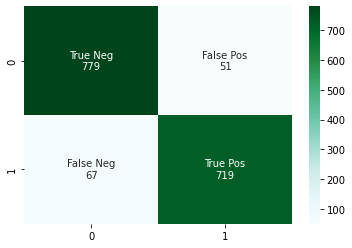

In [15]:
best_grid_eval = modelo_evaluacion(best_grid, X_test, y_test)

print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('AUC:', best_grid_eval['auc'])
print('Matriz de confusión:')

Comparación de modelos RF base y la versión optimizada:

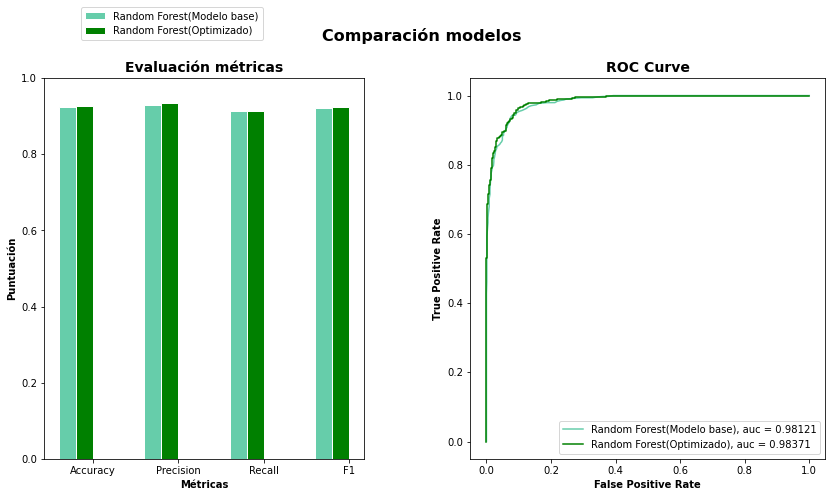

,Accuracy,Precision,Recall,F1
rf base,0.925124,0.930142,0.914758,0.922386
rf optimizado,0.926980,0.933766,0.914758,0.924165


In [16]:
# Inicializamos los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparación modelos', fontsize = 16, fontweight = 'bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Valores del primer gráfico
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1']]


# Posición de las barras en el eje X
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

# Primer gráfico
ax1.bar(r1, rf_score, width = barWidth, edgecolor = 'white', label = 'Random Forest(Modelo base)', 
        color = 'mediumaquamarine')
ax1.bar(r2, best_grid_score, width = barWidth, edgecolor = 'white', label = 'Random Forest(Optimizado)', 
        color = 'green')

# Ejes x e y
ax1.set_xlabel('Métricas', fontweight = 'bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(rf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Puntuación', fontweight='bold')
ax1.set_ylim(0, 1)

# Leyenda y título
ax1.set_title('Evaluación métricas', fontsize = 14, fontweight = 'bold')
pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax1.legend(loc = 9, bbox_to_anchor = (0.4, 1.2), ncol = 1)

# Segundo gráfico con las curvas AUC
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label = 'Random Forest(Modelo base), auc = {:0.5f}'.format(rf_eval['auc']), color = 'mediumaquamarine')
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label = 'Random Forest(Optimizado), auc = {:0.5f}'.format(best_grid_eval['auc']), color = 'green')

# Ejes x e y
ax2.set_xlabel('False Positive Rate', fontweight = 'bold')
ax2.set_ylabel('True Positive Rate', fontweight = 'bold')

# Leyenda y título
ax2.set_title('ROC Curve', fontsize = 14, fontweight = 'bold')
ax2.legend(loc = 4)

plt.show()

# DataFrame con los resultados de las métricas
Resultados = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall ', 
            'F1'], data = {'rf base' : rf_score, 'rf optimizado' : best_grid_score})
Resultados.transpose( )

Identificamos la importancia de las característica:

In [17]:
Despoblacion.drop(['Nombre CCAA', 'Codigo CCAA', 'Nombre Provincia', 'Codigo Provincia', 
                    'Nombre Municipio', 'Codigo Municipio', 'Densidad Poblacion', 'Umbral', 'Superficie Km2'], axis = 1, inplace = True)

In [18]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"Características": list(Despoblacion.columns), "Importancia": best_grid.feature_importances_}
).sort_values("Importancia", ascending=False)

feature_importances_df

,Características,Importancia
64,Superficie (Ha) Agricolas,0.106746
32,Edad < 16,0.086502
58,Nº Hogares si Internet,0.079525
41,Con Estudios,0.070896
55,4 personas,0.066678
4,Nacimientos,0.051201
33,16 =< Edad =<64,0.043272
35,Soltero/a,0.036507
45,1 hijo/a,0.035883
61,Nº Conductores,0.031069


Visualizamos las 10 caracterísicas más importantes:

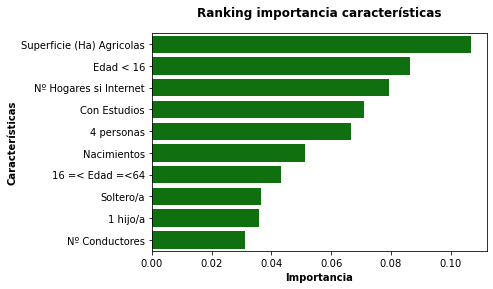

[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.2s
[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   5.0s
[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   4.5s
[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   6.6s
[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   6.8s
[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   7.0s
[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=70, max_features=9, min_samples_leaf=4, min

In [19]:
ax = sns.barplot(data=feature_importances_df.head(10), x = 'Importancia', y = 'Características', color = 'Green')

ax.set_xlabel('Importancia', fontweight = 'bold')
ax.set_ylabel('Características', fontweight = 'bold')
ax.set_title('Ranking importancia características', weight = "bold", fontsize = '12', y = 1.05)

plt.show()